# Спрос на рейсы авиакомпании

Авиакомпании выполняющей внутренние пассажирские перевозки важно понять предпочтения пользователей.  
Имеется база данных рейсов в города, где проходят крупнейшие культурные фестивали.  

Описание данных:

**query_1.csv**:  
`model` — модель самолета  
`flights_amount` — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года

**query_3.csv**:  
`city` — город  
`average_flights` — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Визуализация" data-toc-modified-id="Визуализация-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Визуализация</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

## Аналитика

In [1]:

import pandas as pd
!pip install -U seaborn  
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plot


Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)


In [2]:

models_flights = pd.read_csv('...query_1.csv')
cities_flights = pd.read_csv('...query_3.csv')


In [3]:

display(models_flights)
display(cities_flights.head())


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Столбцы названы в стиле `snake_case`  
Первые столбцы в обеих таблицах содержат строки, вторые числа.  
Видно что три модели самолетов совершают подавляющее число перелетов.  

In [4]:

display(models_flights.info(memory_usage='deep'))
display(cities_flights.info(memory_usage='deep'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 775.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 10.7 KB


None

Пропуски отсутствуют.  
Типы данных верные.  
Расход памяти небольшой.  

In [5]:

display(models_flights.describe(include = 'all').T)
display(cities_flights.describe(include = 'all').T)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
model,8,8,Boeing 777-300,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flights_amount,8,NaN,NaN,NaN,2035.62,1965.2,300,605.25,795,4250.25,4557


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
city,101,101,Саратов,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_flights,101,NaN,NaN,NaN,5.49419,13.1198,1,2,3,5.87097,129.774


Разброс значений в количестве полетов по маркам самолетов значительный, от 300 до 4557.  
Полеты совершаются по 101 городу.  
Диапазон средних значений по дням - от 1 до 129.  
Посмотрим на `top10` городов по среднему количеству полетов в день.  
И добавим проценты для лучшего восприятия.  

In [6]:

top_cities_flights = cities_flights.sort_values(
    by='average_flights',
    ascending=False
).iloc[:10].copy()

top_cities_flights['percentage'] = top_cities_flights['average_flights'].apply(
    lambda x: (x/sum(top_cities_flights['average_flights'])*100)
)

top_cities_flights


,city,average_flights,percentage
43,Москва,129.774194,51.769399
70,Санкт-Петербург,31.161290,12.430833
54,Новосибирск,17.322581,6.910308
33,Красноярск,11.580645,4.619740
20,Екатеринбург,11.322581,4.516793
67,Ростов-на-Дону,10.193548,4.066401
63,Пермь,10.129032,4.040664
10,Брянск,10.000000,3.989191
74,Сочи,9.612903,3.834770
84,Ульяновск,9.580645,3.821902


In [7]:

models_flights['percentage'] = models_flights['flights_amount'].apply(
    lambda x: (x/sum(models_flights['flights_amount'])*100)
)


In [8]:

cities_flights['percentage'] = cities_flights['average_flights'].apply(
    lambda x: (x/sum(cities_flights['average_flights'])*100)
)


## Визуализация

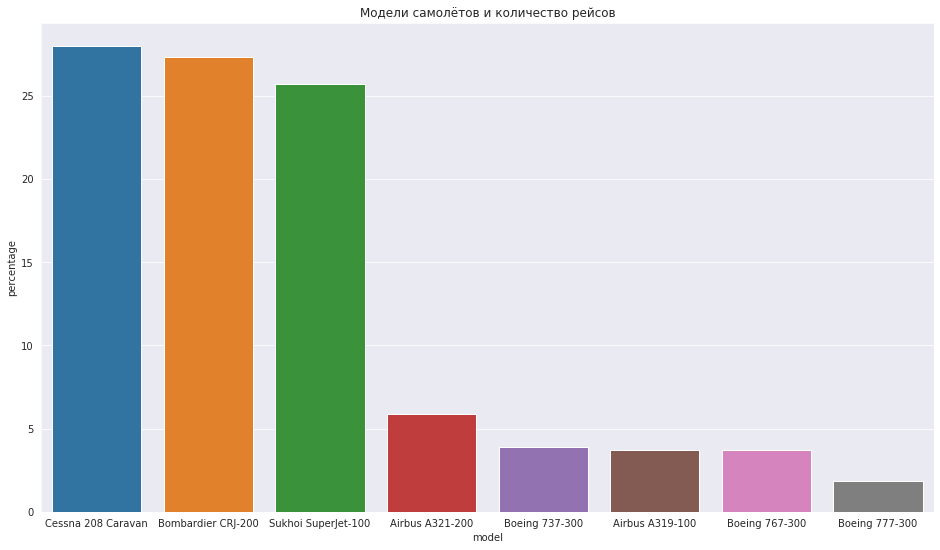

In [9]:

plot.figure(figsize=(16, 9))
ax = sns.barplot(
    x='model',
    y='percentage',
    data=models_flights.sort_values(
        by='percentage',
        ascending=False
    ), capsize=.2
).set_title('Модели самолётов и количество рейсов')


Более 80% полетов совершают три вида самолетов.  
Они покрывают разные классы вместимости, от 13 у Цесны до 108 у Сухого.  
Боинг 777-300 с максимальной вместимостью 550 пассажиров на последнем месте (<2.5%).  

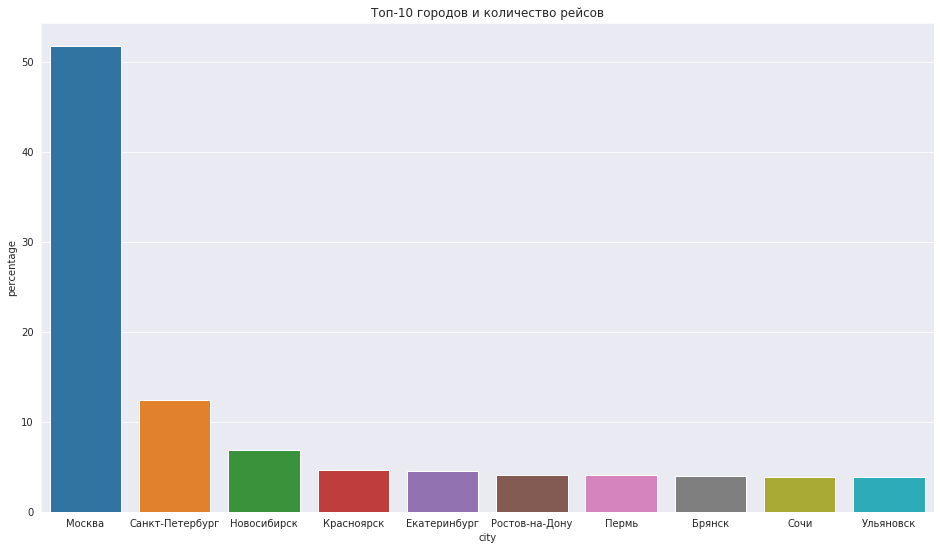

In [10]:

plot.figure(figsize=(16, 9))
ax = sns.barplot(
    x='city',
    y='percentage',
    data=top_cities_flights,
    capsize=.2
).set_title('Топ-10 городов и количество рейсов')


В лидерах `top10`городов по среднему количеству рейсов выделяются Москва, Санкт-Петербург, Новосибирск (около 70% всех полетов).  

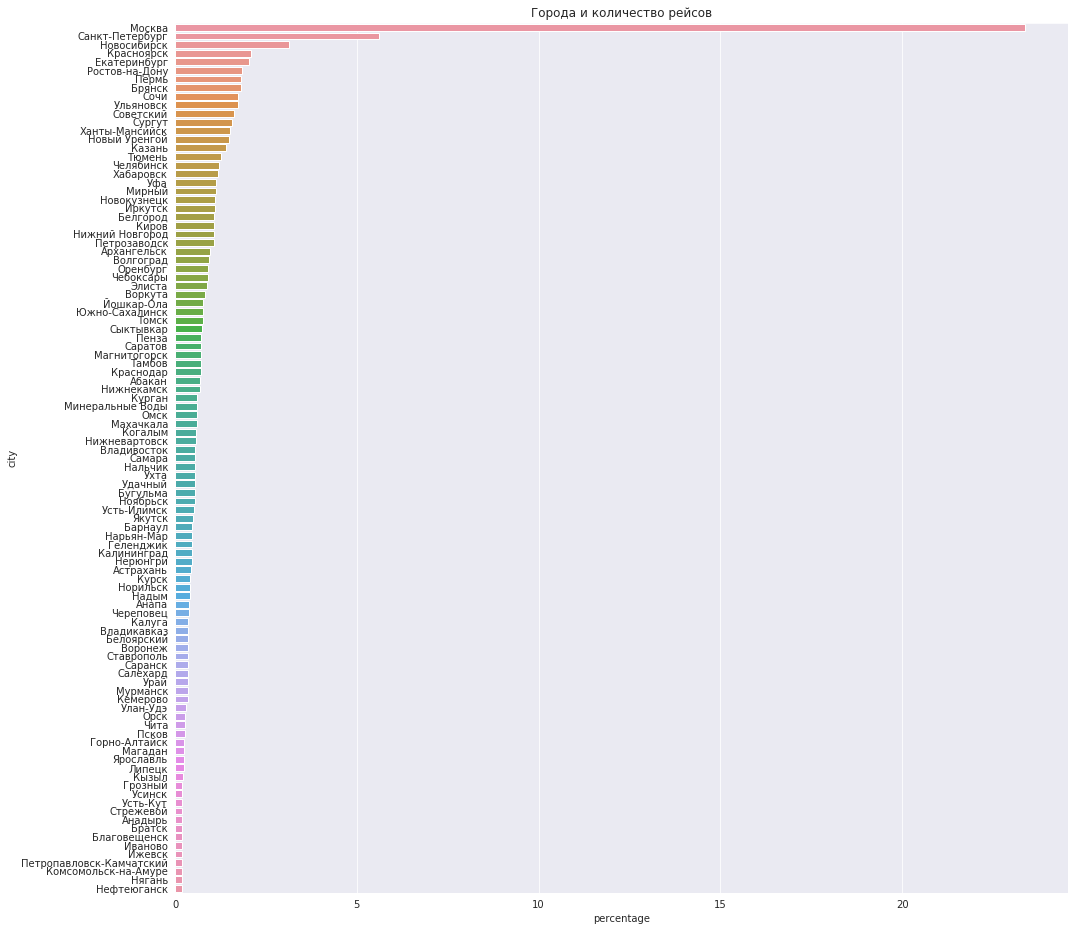

In [11]:

plot.figure(figsize=(16, 16))
ax = sns.barplot(
    x='percentage',
    y='city',
    data=cities_flights.sort_values(
        by='percentage',
        ascending=False
    ),
    capsize=.2
).set_title('Города и количество рейсов')


Если смотреть все города, то Москва, Санкт-Петербург, Новосибирск имеют порядка 36% полетов.   
Теперь то же самое, но без тройки лидеров.  

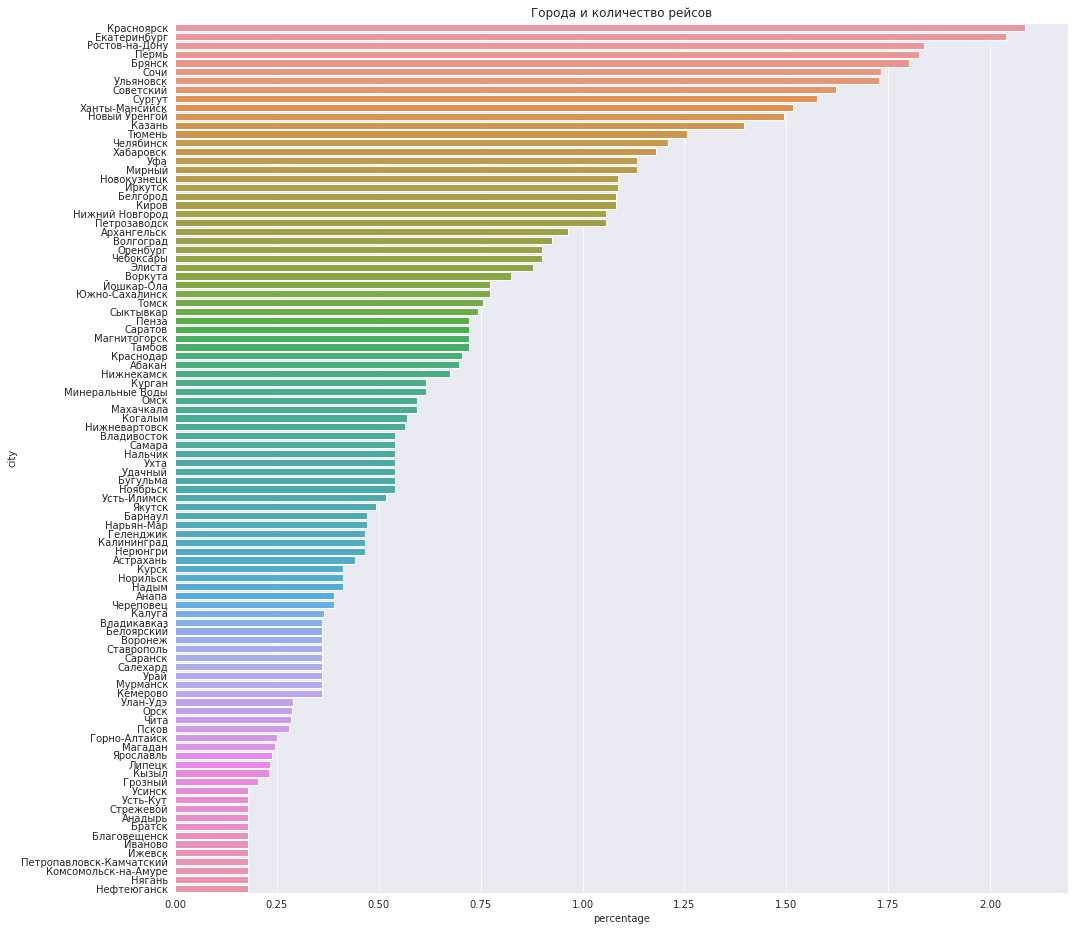

In [12]:

plot.figure(figsize=(16, 16))
ax = sns.barplot(
    x='percentage',
    y='city',
    data=cities_flights.sort_values(
        by='percentage',
        ascending=False
    ).iloc[3:],
    capsize=.2
).set_title('Города и количество рейсов')


## Общий вывод

Разброс значений в количестве полетов по маркам самолетов от 300 до 4557.  
Полеты совершаются по 101 городу.  
Диапазон средних значений за день: от 1 до 129.   
Более 80% полетов совершают три вида самолетов.  
Они покрывают разные классы вместимости, от 13 у Цесны до 108 у Сухого.  
Боинг 777-300 с максимальной вместимостью 550 пассажиров на последнем месте (<2.5%).  
В лидерах `top10` городов по среднему количеству рейсов выделяются Москва, Санкт-Петербург, Новосибирск (около 70% всех полетов).  
Если смотреть все города, то Москва, Санкт-Петербург, Новосибирск имеют порядка 36% полетов.   